In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.lines as mlines
import threading

### Hỗn hợp

In [2]:
honhop_folder = "data2/Honhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
honhop = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop.columns = ['_'.join(map(str, col)) for col in honhop.columns]
honhop["File name"] = file_names
honhop["Type"] = honhop["File name"].str.split("-", expand=True)[0].str[0]
honhop_deriv = savgol_filter(honhop.iloc[:, :-2], window_length=25, polyorder=5, deriv=2)
honhop.iloc[:, :-2] = honhop_deriv

### Rễ

In [3]:
re_folder = "data2/Re"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(re_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(re_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
re = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
re.columns = ['_'.join(map(str, col)) for col in re.columns]
re["File name"] = file_names
re["Type"] = re["File name"].str.split("-", expand=True)[0].str[0]
re_deriv = savgol_filter(re.iloc[:, :-2], window_length=25, polyorder=5, deriv=2)
re.iloc[:, :-2] = re_deriv

### Thân

In [4]:
than_folder = "data2/Than"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(than_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(than_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
than = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
than.columns = ['_'.join(map(str, col)) for col in than.columns]
than["File name"] = file_names
than["Type"] = than["File name"].str.split("-", expand=True)[0].str[0]
than_deriv = savgol_filter(than.iloc[:, :-2], window_length=25, polyorder=5, deriv=2)
than.iloc[:, :-2] = than_deriv

In [5]:
data = pd.concat([honhop, re, than], axis=0)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Type"])

In [7]:
wl = honhop.columns

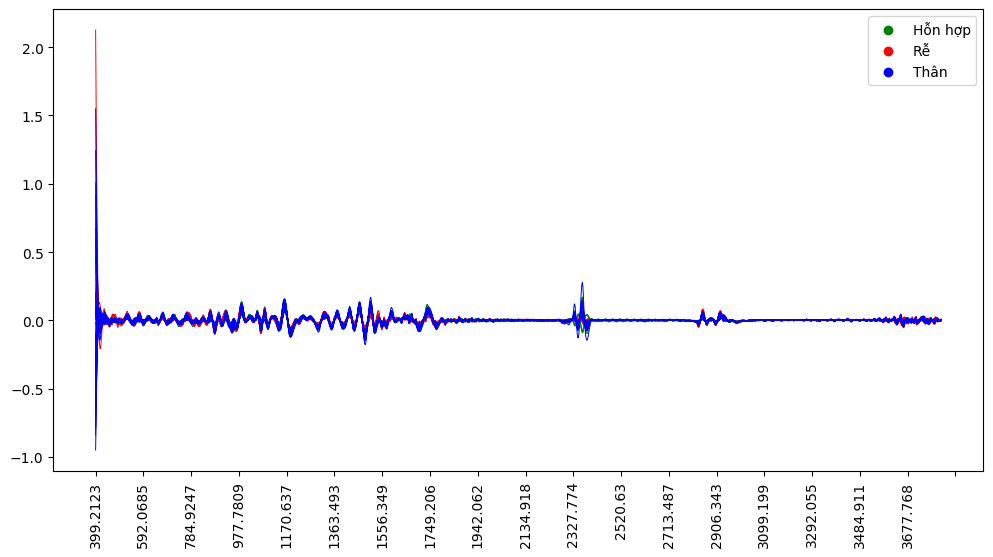

In [8]:
hh = mlines.Line2D([], [], color='green', marker='o', ls='', label='Hỗn hợp')
r = mlines.Line2D([], [], color='red', marker='o', ls='', label='Rễ')
t = mlines.Line2D([], [], color='blue', marker='o', ls='', label='Thân')
plt.figure(figsize = (12, 6))
plt.plot(honhop.iloc[:, :-100].T, linewidth = 0.7, color = 'green')
plt.plot(re.iloc[:, :-100].T, linewidth = 0.7, color = 'red')
plt.plot(than.iloc[:, :-100].T, linewidth = 0.7, color = 'blue')
plt.gca().set_xticks(np.arange(0, len(wl), 100))
plt.xticks(rotation=90)
plt.legend(handles = [hh,r, t])
plt.show()

In [9]:
re.shape, than.shape, honhop.shape

((49, 1871), (45, 1871), (25, 1871))